# SQLAlchemy Object Related Mapping

## Building an API (Application Programming Interface) and statistics analysis (paired sample t-test)

#### By Rodrigo Guarneros

### Dependencies

In [552]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys() #we have two tables (measurement and station)


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

In [10]:
#using inspector to know better the database
inspector=inspect(engine)

In [11]:
inspector.get_table_names()

['measurement', 'station']

In [12]:
# lets see the columns
inspector.get_columns("station")
for col in inspector.get_columns("station"):
    print(col["name"],col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
inspector.get_columns("measurement")
for col2 in inspector.get_columns("measurement"):
    print(col2["name"], col2["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
#Lets query all inside Measurement table
x = session.query(Measurement).all() 

In [15]:
#making a iteration by object in x(session query for Measurement Table)
for i in x:
    print(f'Station: {i.station}, date:{i.date}, precipitation:{i.prcp}, temp:{i.tobs}')

Station: USC00519397, date:2010-01-01, precipitation:0.08, temp:65.0
Station: USC00519397, date:2010-01-02, precipitation:0.0, temp:63.0
Station: USC00519397, date:2010-01-03, precipitation:0.0, temp:74.0
Station: USC00519397, date:2010-01-04, precipitation:0.0, temp:76.0
Station: USC00519397, date:2010-01-06, precipitation:None, temp:73.0
Station: USC00519397, date:2010-01-07, precipitation:0.06, temp:70.0
Station: USC00519397, date:2010-01-08, precipitation:0.0, temp:64.0
Station: USC00519397, date:2010-01-09, precipitation:0.0, temp:68.0
Station: USC00519397, date:2010-01-10, precipitation:0.0, temp:73.0
Station: USC00519397, date:2010-01-11, precipitation:0.01, temp:64.0
Station: USC00519397, date:2010-01-12, precipitation:0.0, temp:61.0
Station: USC00519397, date:2010-01-14, precipitation:0.0, temp:66.0
Station: USC00519397, date:2010-01-15, precipitation:0.0, temp:65.0
Station: USC00519397, date:2010-01-16, precipitation:0.0, temp:68.0
Station: USC00519397, date:2010-01-17, preci

Station: USC00513117, date:2010-06-03, precipitation:0.0, temp:75.0
Station: USC00513117, date:2010-06-04, precipitation:0.0, temp:75.0
Station: USC00513117, date:2010-06-05, precipitation:0.0, temp:74.0
Station: USC00513117, date:2010-06-06, precipitation:0.0, temp:75.0
Station: USC00513117, date:2010-06-07, precipitation:0.02, temp:75.0
Station: USC00513117, date:2010-06-08, precipitation:0.0, temp:75.0
Station: USC00513117, date:2010-06-09, precipitation:0.0, temp:75.0
Station: USC00513117, date:2010-06-10, precipitation:0.02, temp:75.0
Station: USC00513117, date:2010-06-11, precipitation:0.0, temp:83.0
Station: USC00513117, date:2010-06-12, precipitation:0.0, temp:75.0
Station: USC00513117, date:2010-06-13, precipitation:0.01, temp:76.0
Station: USC00513117, date:2010-06-14, precipitation:0.06, temp:73.0
Station: USC00513117, date:2010-06-15, precipitation:0.0, temp:74.0
Station: USC00513117, date:2010-06-16, precipitation:0.01, temp:74.0
Station: USC00513117, date:2010-06-17, prec

Station: USC00513117, date:2016-01-20, precipitation:0.02, temp:67.0
Station: USC00513117, date:2016-01-21, precipitation:0.27, temp:75.0
Station: USC00513117, date:2016-01-22, precipitation:0.01, temp:70.0
Station: USC00513117, date:2016-01-23, precipitation:0.0, temp:71.0
Station: USC00513117, date:2016-01-24, precipitation:0.0, temp:70.0
Station: USC00513117, date:2016-01-25, precipitation:0.13, temp:70.0
Station: USC00513117, date:2016-01-26, precipitation:0.16, temp:77.0
Station: USC00513117, date:2016-01-27, precipitation:0.0, temp:71.0
Station: USC00513117, date:2016-01-28, precipitation:0.0, temp:68.0
Station: USC00513117, date:2016-01-29, precipitation:0.0, temp:69.0
Station: USC00513117, date:2016-01-30, precipitation:0.0, temp:67.0
Station: USC00513117, date:2016-01-31, precipitation:0.0, temp:72.0
Station: USC00513117, date:2016-02-01, precipitation:0.0, temp:78.0
Station: USC00513117, date:2016-02-02, precipitation:0.41, temp:68.0
Station: USC00513117, date:2016-02-03, pre

Station: USC00514830, date:2015-03-03, precipitation:0.0, temp:75.0
Station: USC00514830, date:2015-03-04, precipitation:0.02, temp:73.0
Station: USC00514830, date:2015-03-05, precipitation:0.42, temp:72.0
Station: USC00514830, date:2015-03-06, precipitation:0.09, temp:72.0
Station: USC00514830, date:2015-03-07, precipitation:0.0, temp:71.0
Station: USC00514830, date:2015-03-12, precipitation:0.01, temp:67.0
Station: USC00514830, date:2015-03-13, precipitation:0.13, temp:70.0
Station: USC00514830, date:2015-03-16, precipitation:None, temp:74.0
Station: USC00514830, date:2015-03-17, precipitation:0.0, temp:73.0
Station: USC00514830, date:2015-03-18, precipitation:0.0, temp:73.0
Station: USC00514830, date:2015-03-19, precipitation:0.0, temp:70.0
Station: USC00514830, date:2015-03-20, precipitation:0.02, temp:72.0
Station: USC00514830, date:2015-03-22, precipitation:None, temp:77.0
Station: USC00514830, date:2015-03-23, precipitation:0.0, temp:76.0
Station: USC00514830, date:2015-03-24, p

Station: USC00518838, date:2012-02-09, precipitation:None, temp:70.0
Station: USC00518838, date:2012-02-10, precipitation:0.0, temp:71.0
Station: USC00518838, date:2012-02-14, precipitation:None, temp:74.0
Station: USC00518838, date:2012-02-15, precipitation:0.0, temp:74.0
Station: USC00518838, date:2012-02-24, precipitation:None, temp:76.0
Station: USC00518838, date:2012-02-27, precipitation:None, temp:73.0
Station: USC00518838, date:2012-02-29, precipitation:None, temp:74.0
Station: USC00518838, date:2012-03-01, precipitation:0.0, temp:71.0
Station: USC00518838, date:2012-03-03, precipitation:0.22, temp:65.0
Station: USC00518838, date:2012-03-04, precipitation:2.7, temp:65.0
Station: USC00518838, date:2012-03-05, precipitation:0.92, temp:62.0
Station: USC00518838, date:2012-04-02, precipitation:None, temp:79.0
Station: USC00518838, date:2012-04-04, precipitation:None, temp:74.0
Station: USC00518838, date:2012-04-05, precipitation:0.3, temp:69.0
Station: USC00518838, date:2012-04-09, 

Station: USC00519523, date:2016-09-16, precipitation:0.01, temp:78.0
Station: USC00519523, date:2016-09-17, precipitation:0.0, temp:81.0
Station: USC00519523, date:2016-09-18, precipitation:0.04, temp:81.0
Station: USC00519523, date:2016-09-19, precipitation:0.05, temp:78.0
Station: USC00519523, date:2016-09-20, precipitation:0.04, temp:77.0
Station: USC00519523, date:2016-09-21, precipitation:0.0, temp:79.0
Station: USC00519523, date:2016-09-22, precipitation:0.01, temp:79.0
Station: USC00519523, date:2016-09-23, precipitation:0.0, temp:80.0
Station: USC00519523, date:2016-09-24, precipitation:0.0, temp:83.0
Station: USC00519523, date:2016-09-25, precipitation:0.0, temp:82.0
Station: USC00519523, date:2016-09-26, precipitation:0.34, temp:78.0
Station: USC00519523, date:2016-09-27, precipitation:0.05, temp:78.0
Station: USC00519523, date:2016-09-28, precipitation:0.0, temp:78.0
Station: USC00519523, date:2016-09-29, precipitation:0.18, temp:82.0
Station: USC00519523, date:2016-09-30, p

Station: USC00519281, date:2016-01-01, precipitation:0.02, temp:74.0
Station: USC00519281, date:2016-01-02, precipitation:0.03, temp:72.0
Station: USC00519281, date:2016-01-03, precipitation:0.0, temp:68.0
Station: USC00519281, date:2016-01-04, precipitation:0.0, temp:69.0
Station: USC00519281, date:2016-01-05, precipitation:0.18, temp:70.0
Station: USC00519281, date:2016-01-06, precipitation:0.35, temp:69.0
Station: USC00519281, date:2016-01-07, precipitation:0.35, temp:76.0
Station: USC00519281, date:2016-01-08, precipitation:0.02, temp:75.0
Station: USC00519281, date:2016-01-09, precipitation:0.02, temp:74.0
Station: USC00519281, date:2016-01-10, precipitation:0.02, temp:74.0
Station: USC00519281, date:2016-01-11, precipitation:0.0, temp:73.0
Station: USC00519281, date:2016-01-12, precipitation:0.02, temp:75.0
Station: USC00519281, date:2016-01-13, precipitation:0.0, temp:74.0
Station: USC00519281, date:2016-01-14, precipitation:0.0, temp:66.0
Station: USC00519281, date:2016-01-15, 

Station: USC00516128, date:2011-03-27, precipitation:0.38, temp:74.0
Station: USC00516128, date:2011-03-28, precipitation:0.26, temp:68.0
Station: USC00516128, date:2011-03-29, precipitation:0.11, temp:68.0
Station: USC00516128, date:2011-03-30, precipitation:0.18, temp:74.0
Station: USC00516128, date:2011-03-31, precipitation:0.0, temp:72.0
Station: USC00516128, date:2011-04-01, precipitation:1.16, temp:67.0
Station: USC00516128, date:2011-04-02, precipitation:1.15, temp:74.0
Station: USC00516128, date:2011-04-03, precipitation:0.59, temp:71.0
Station: USC00516128, date:2011-04-04, precipitation:0.05, temp:73.0
Station: USC00516128, date:2011-04-05, precipitation:0.42, temp:69.0
Station: USC00516128, date:2011-04-06, precipitation:0.18, temp:69.0
Station: USC00516128, date:2011-04-07, precipitation:3.35, temp:71.0
Station: USC00516128, date:2011-04-08, precipitation:0.34, temp:71.0
Station: USC00516128, date:2011-04-09, precipitation:0.03, temp:75.0
Station: USC00516128, date:2011-04-

Station: USC00516128, date:2017-02-14, precipitation:0.01, temp:79.0
Station: USC00516128, date:2017-02-15, precipitation:0.07, temp:71.0
Station: USC00516128, date:2017-02-16, precipitation:0.13, temp:72.0
Station: USC00516128, date:2017-02-18, precipitation:None, temp:72.0
Station: USC00516128, date:2017-02-19, precipitation:0.1, temp:68.0
Station: USC00516128, date:2017-02-20, precipitation:0.0, temp:69.0
Station: USC00516128, date:2017-02-21, precipitation:0.07, temp:65.0
Station: USC00516128, date:2017-02-22, precipitation:0.32, temp:69.0
Station: USC00516128, date:2017-02-23, precipitation:0.0, temp:72.0
Station: USC00516128, date:2017-02-24, precipitation:0.0, temp:68.0
Station: USC00516128, date:2017-02-25, precipitation:0.12, temp:66.0
Station: USC00516128, date:2017-02-26, precipitation:0.0, temp:64.0
Station: USC00516128, date:2017-02-27, precipitation:0.0, temp:69.0
Station: USC00516128, date:2017-02-28, precipitation:0.58, temp:69.0
Station: USC00516128, date:2017-03-01, p

In [16]:
engine.execute("select*from Measurement limit 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [17]:
for j in session.query(Measurement).filter(Measurement.date >= '2016-08-23').all():
    print(f'Station: date:{j.date}, precipitation:{j.prcp}')

Station: date:2016-08-23, precipitation:0.0
Station: date:2016-08-24, precipitation:0.08
Station: date:2016-08-25, precipitation:0.08
Station: date:2016-08-26, precipitation:0.0
Station: date:2016-08-27, precipitation:0.0
Station: date:2016-08-28, precipitation:0.01
Station: date:2016-08-29, precipitation:0.0
Station: date:2016-08-30, precipitation:0.0
Station: date:2016-08-31, precipitation:0.13
Station: date:2016-09-01, precipitation:0.0
Station: date:2016-09-02, precipitation:0.0
Station: date:2016-09-03, precipitation:0.0
Station: date:2016-09-04, precipitation:0.03
Station: date:2016-09-05, precipitation:None
Station: date:2016-09-06, precipitation:None
Station: date:2016-09-07, precipitation:0.05
Station: date:2016-09-08, precipitation:0.0
Station: date:2016-09-09, precipitation:0.03
Station: date:2016-09-10, precipitation:0.0
Station: date:2016-09-11, precipitation:0.05
Station: date:2016-09-12, precipitation:0.0
Station: date:2016-09-13, precipitation:0.02
Station: date:2016-09

Station: date:2016-12-24, precipitation:0.13
Station: date:2016-12-26, precipitation:None
Station: date:2016-12-27, precipitation:0.02
Station: date:2016-12-28, precipitation:0.01
Station: date:2016-12-29, precipitation:0.56
Station: date:2016-12-30, precipitation:0.29
Station: date:2016-12-31, precipitation:0.36
Station: date:2017-01-01, precipitation:0.0
Station: date:2017-01-02, precipitation:0.01
Station: date:2017-01-03, precipitation:0.0
Station: date:2017-01-04, precipitation:0.0
Station: date:2017-01-05, precipitation:0.0
Station: date:2017-01-06, precipitation:0.59
Station: date:2017-01-07, precipitation:0.0
Station: date:2017-01-08, precipitation:0.03
Station: date:2017-01-09, precipitation:0.0
Station: date:2017-01-10, precipitation:0.0
Station: date:2017-01-11, precipitation:0.0
Station: date:2017-01-13, precipitation:None
Station: date:2017-01-14, precipitation:0.0
Station: date:2017-01-16, precipitation:None
Station: date:2017-01-17, precipitation:0.0
Station: date:2017-0

Station: date:2017-05-27, precipitation:0.0
Station: date:2017-05-28, precipitation:0.08
Station: date:2017-05-29, precipitation:0.4
Station: date:2017-05-30, precipitation:1.12
Station: date:2017-05-31, precipitation:0.25
Station: date:2017-06-01, precipitation:0.0
Station: date:2017-06-02, precipitation:0.09
Station: date:2017-06-03, precipitation:0.08
Station: date:2017-06-04, precipitation:0.13
Station: date:2017-06-05, precipitation:0.05
Station: date:2017-06-06, precipitation:0.0
Station: date:2017-06-07, precipitation:0.0
Station: date:2017-06-08, precipitation:0.0
Station: date:2017-06-09, precipitation:0.02
Station: date:2017-06-10, precipitation:0.62
Station: date:2017-06-11, precipitation:0.74
Station: date:2017-06-12, precipitation:0.24
Station: date:2017-06-13, precipitation:0.24
Station: date:2017-06-14, precipitation:0.22
Station: date:2017-06-15, precipitation:0.55
Station: date:2017-06-16, precipitation:0.06
Station: date:2017-06-17, precipitation:0.07
Station: date:20

# Step 1 - Exploratory Climate Analysis
## Precipitation Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# dates in sqlachemy do not requiere transformation
# better PANDAS
year = pd.read_sql("SELECT*FROM Measurement WHERE date >= '2016-08-23'",engine)
year

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


In [19]:
#lests search for missing values
year.isnull().sum()/len(year) # 209 missing values in prcp (9.3%)
year = year.dropna()

In [20]:
# lets search for duplicates observation
year[year.duplicated(["id","station","date","prcp"])]
#There is not duplicated information

,id,station,date,prcp,tobs


In [21]:
# we need only date and prcp columns, lets define date as an index
rain = pd.DataFrame(year,columns=["date","prcp"])
rain = rain.rename(columns = {'prcp': 'Precipitation'}, inplace = False)
#rain.set_index("date",inplace=True)
#rain = rain.sort_index()
rain.head()

,date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [22]:
# whe have observations by station and in certain disorder, 
# we need to define a sort by date
rain.set_index("date",inplace=True)
rain = rain.sort_index()
rain.head()

,Precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


Getting the date 1 year ago

In the Julian calendar, the average (mean) length of a year is 365.25 days. In a non-leap year, there are 365 days, in a leap year there are 366 days. A leap year occurs every fourth year, or leap year, during which a leap day is intercalated into the month of February. The name "Leap Day" is applied to the added day.
Even though 2016 is a leap year we will assume 365 days as a year.

In [23]:
# Calculate the date 1 year ago from the last data point in the database
year["date"].max() #2017-08-23 is the most recent date
last_day = dt.date(2017,8,23)
time_delta = dt.timedelta(days=365)
one_year = last_day - time_delta
one_year

datetime.date(2016, 8, 23)

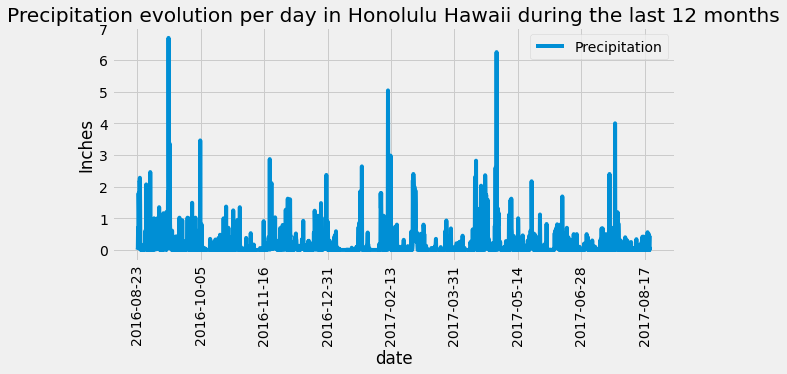

In [24]:
# lets get the graph
rain_plot = rain.plot(figsize=(9,4), rot=90)
rain_plot.set_ylabel("Inches")
rain_plot.set_title("Precipitation evolution per day in Honolulu Hawaii during the last 12 months")
plt.savefig("evolutionbyday.png")

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Stations Analysis

In [26]:
# Design a query to show how many stations are available in this dataset?
# Alternative:
# pd.read_sql("SELECT DISTINCT station FROM Measurement", engine).count()
(
    session
    .query(func.count(Measurement.id))
    .group_by(Measurement.station)
    .count()
)

9

Following the sqlachemy documentation
https://docs.sqlalchemy.org/en/13/orm/query.html

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# We should have in mind we are eliminated 209 missing data
from sqlalchemy import func

In [28]:
# Design a query to find the most active stations.
# hint: you may need to use functions such as func.min, 
# func.max, func.avg, and func.count in your queries.
# return count of measure "id" grouped by "station"

(
    session
    .query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc()).all()
)



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

x = (
    session
    .query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
    .filter(Measurement.station=='USC00519281')
    .all()
)

print(f"""
        Minimal temperature: {x[0][0]}
        Maximal Temperature: {x[0][1]}
        Average Temperature: {round(x[0][2],1)}
""")


        Minimal temperature: 54.0
        Maximal Temperature: 85.0
        Average Temperature: 71.7



In [30]:
# Choose the station with the highest number of temperature observations.
# this is: USC00519281 with 2772 observations
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_selected = (
    session
    .query(Measurement.date, Measurement.tobs)
    .filter(Measurement.station == 'USC00519281')
    .filter(Measurement.date >= one_year).all()
)
station_selected[0:10]

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0)]

In [31]:
# transforming in a dataframe
station_selected_df=pd.DataFrame(station_selected)
station_selected_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


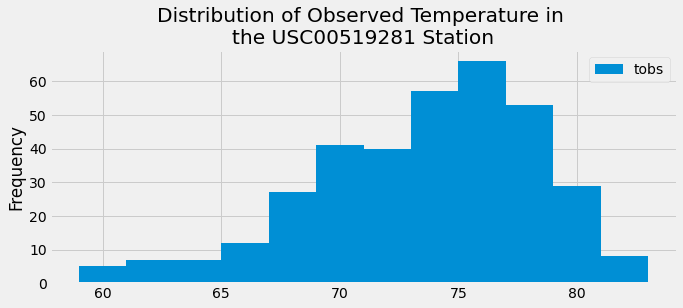

In [32]:
station_temperature_graph = station_selected_df.plot(kind='hist', bins=12, figsize=(10,4))
station_temperature_graph.set_title(f"""Distribution of Observed Temperature in 
the USC00519281 Station""")
plt.savefig("Dist_temp.png")

# Step 2 - Climate App

In [33]:
# Designing an API with a microweb develop based on the queries made before
# this excesice was made and is Available at climate-app.py, please run in python

# Step 3 - Additional Analysis

## Other Recommended Analyses

## Temperature Analysis I

In [43]:
# Hawaii is reputed to enjoy mild weather all year. 
#Is there a meaningful difference between the temperature in, for example, June and December?
# The best approach for this requieres a grup by by month and a subset for june and december

session.query(Measurement.date).order_by(Measurement.date).first() #2010-01-01
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# 17 years (17 junes and 16 decembers)

('2017-08-23')

In [73]:
# Is there a meaninful difference among june and december during 7 years?
# get average temperature in each month during 2010 and 2016.
# getting june

years = [2010,2011, 2012, 2013, 2014, 2015, 2016]
temp_june = []

for x in years:

    z = (
        session
        .query(func.avg(Measurement.tobs))
        .filter(Measurement.date> f'{x}-05-31')
        .filter(Measurement.date<= f'{x}-06-30')
        .all()
        )
    temp_june.append(z)      
    
    print(f'Average temp {x}, june, is: {z}')

temp_june

Average temp 2010, june, is: [(74.92561983471074,)]
Average temp 2011, june, is: [(73.93832599118943,)]
Average temp 2012, june, is: [(74.0,)]
Average temp 2013, june, is: [(74.59907834101382,)]
Average temp 2014, june, is: [(75.02790697674419,)]
Average temp 2015, june, is: [(74.99014778325123,)]
Average temp 2016, june, is: [(75.17525773195877,)]


[[(74.92561983471074)],
 [(73.93832599118943)],
 [(74.0)],
 [(74.59907834101382)],
 [(75.02790697674419)],
 [(74.99014778325123)],
 [(75.17525773195877)]]

In [123]:
# Getting december
years = [2010,2011, 2012, 2013, 2014, 2015, 2016]
temp_december=[]
for x in years:

    z = (
        session
        .query(func.avg(Measurement.tobs))
        .filter(Measurement.date> f'{x}-11-30')
        .filter(Measurement.date<= f'{x}-12-31')
        .all()
        )
    temp_december.append(z)
    
    print(f'Average temp {x}, december is: {z}')
    
temp_december

Average temp 2010, december is: [(70.20851063829787,)]
Average temp 2011, december is: [(70.82062780269058,)]
Average temp 2012, december is: [(71.18807339449542,)]
Average temp 2013, december is: [(71.09401709401709,)]
Average temp 2014, december is: [(69.89686098654708,)]
Average temp 2015, december is: [(73.42391304347827,)]
Average temp 2016, december is: [(71.13,)]


[[(70.20851063829787)],
 [(70.82062780269058)],
 [(71.18807339449542)],
 [(71.09401709401709)],
 [(69.89686098654708)],
 [(73.42391304347827)],
 [(71.13)]]

In [193]:
dec = pd.DataFrame(temp_december)[0].str[0]
dec = pd.Series(dec, name="December")
dec

0    70.208511
1    70.820628
2    71.188073
3    71.094017
4    69.896861
5    73.423913
6    71.130000
Name: December, dtype: float64

In [194]:
jun = pd.DataFrame(temp_june)[0].str[0]
jun = pd.Series(jun, name="June")
jun

0    74.925620
1    73.938326
2    74.000000
3    74.599078
4    75.027907
5    74.990148
6    75.175258
Name: June, dtype: float64

In [205]:
june_dec = pd.concat([jun, dec], axis=1)

june_dec = pd.DataFrame(june_dec)


In [206]:
june_dec["difference"] = june_dec["December"]-june_dec["June"]
june_dec

#There is not main difference between june and december during the las 7 years
#I think is more comftable in December

,June,December,difference
0,74.925620,70.208511,-4.717109
1,73.938326,70.820628,-3.117698
2,74.000000,71.188073,-2.811927
3,74.599078,71.094017,-3.505061
4,75.027907,69.896861,-5.131046
5,74.990148,73.423913,-1.566235
6,75.175258,71.130000,-4.045258


In [224]:
# Identify the average temperature 
# in June at all stations across all available years in the dataset. Do the same for December temperature.
years = [2010,2011, 2012, 2013, 2014, 2015, 2016]
stations = ['USC00519281','USC00519397','USC00519523', 'USC00516128','USC00514830','USC00511918','USC00517948','USC00518838']
temp_june2=[]
for x in years:

    z = (
        session
        .query(func.avg(Measurement.tobs))
        .group_by(Measurement.station) # we only add a group by for every station
        .filter(Measurement.date> f'{x}-05-31')
        .filter(Measurement.date<= f'{x}-06-30')
        .all()
        )
    temp_june2.append(z)      
    
    print(f'Station Average temp {x}, june, is: {z}')

temp_june2

Station Average temp 2010, june, is: [(75.62068965517241,), (74.8,), (73.6896551724138,), (72.86363636363636,), (76.75,), (72.56521739130434,), (73.63333333333334,), (77.76666666666667,), (76.17241379310344,)]
Station Average temp 2011, june, is: [(73.43333333333334,), (73.46666666666667,), (72.58333333333333,), (70.73333333333333,), (75.19047619047619,), (75.4,), (74.61538461538461,), (76.53846153846153,), (75.0,)]
Station Average temp 2012, june, is: [(75.34482758620689,), (72.2,), (75.66666666666667,), (70.96428571428571,), (74.95,), (73.2,), (72.7,), (76.23333333333333,), (75.4,)]
Station Average temp 2013, june, is: [(74.93333333333334,), (73.56666666666666,), (76.25,), (71.2,), (76.0,), (72.76666666666667,), (77.0,), (76.24137931034483,)]
Station Average temp 2014, june, is: [(73.96428571428571,), (73.83333333333333,), (76.53846153846153,), (71.72413793103448,), (78.46666666666667,), (72.73333333333333,), (78.13333333333334,), (76.74074074074075,)]
Station Average temp 2015, june

[[(75.62068965517241),
  (74.8),
  (73.6896551724138),
  (72.86363636363636),
  (76.75),
  (72.56521739130434),
  (73.63333333333334),
  (77.76666666666667),
  (76.17241379310344)],
 [(73.43333333333334),
  (73.46666666666667),
  (72.58333333333333),
  (70.73333333333333),
  (75.19047619047619),
  (75.4),
  (74.61538461538461),
  (76.53846153846153),
  (75.0)],
 [(75.34482758620689),
  (72.2),
  (75.66666666666667),
  (70.96428571428571),
  (74.95),
  (73.2),
  (72.7),
  (76.23333333333333),
  (75.4)],
 [(74.93333333333334),
  (73.56666666666666),
  (76.25),
  (71.2),
  (76.0),
  (72.76666666666667),
  (77.0),
  (76.24137931034483)],
 [(73.96428571428571),
  (73.83333333333333),
  (76.53846153846153),
  (71.72413793103448),
  (78.46666666666667),
  (72.73333333333333),
  (78.13333333333334),
  (76.74074074074075)],
 [(70.15789473684211),
  (74.8076923076923),
  (77.29629629629629),
  (71.62068965517241),
  (78.6923076923077),
  (72.16666666666667),
  (78.3),
  (77.37931034482759)],
 [(

In [304]:
june = pd.DataFrame(temp_june2)
june = june.rename(columns={0:'USC00519281', 1:'USC00519397', 2:'USC00513117' ,3:'USC00519523', 4:'USC00516128', 5:'USC00514830', 6:'USC00511918', 7:'USC00517948', 8:'USC00518838'})
idx = 0
years = [2010,2011, 2012, 2013, 2014, 2015, 2016]
june = june.stack().str[0].unstack()
june.insert(loc=idx, column="years", value=years)
june.set_index("years")
june

,years,USC00519281,USC00519397,USC00513117,USC00519523,USC00516128,USC00514830,USC00511918,USC00517948,USC00518838
0,2010,75.620690,74.800000,73.689655,72.863636,76.750000,72.565217,73.633333,77.766667,76.172414
1,2011,73.433333,73.466667,72.583333,70.733333,75.190476,75.400000,74.615385,76.538462,75.000000
2,2012,75.344828,72.200000,75.666667,70.964286,74.950000,73.200000,72.700000,76.233333,75.400000
3,2013,74.933333,73.566667,76.250000,71.200000,76.000000,72.766667,77.000000,76.241379,NaN
4,2014,73.964286,73.833333,76.538462,71.724138,78.466667,72.733333,78.133333,76.740741,NaN
5,2015,70.157895,74.807692,77.296296,71.620690,78.692308,72.166667,78.300000,77.379310,NaN
6,2016,73.866667,77.111111,71.814815,75.809524,72.966667,77.166667,77.620690,NaN,NaN


In [277]:
# Identify the average temperature 
# in December at all stations across all available years in the dataset. Do the same for December temperature.
years = [2010,2011, 2012, 2013, 2014, 2015, 2016]
stations = ['USC00519281','USC00519397','USC00519523', 'USC00516128','USC00514830','USC00511918','USC00517948','USC00518838']
temp_december2=[]
for x in years:

    z = (
        session
        .query(func.avg(Measurement.tobs))
        .group_by(Measurement.station) # we only add a group by for every station
        .filter(Measurement.date> f'{x}-11-30')
        .filter(Measurement.date<= f'{x}-12-31')
        .all()
        )
    temp_december2.append(z)      
    
    print(f'Station Average temp {x}, december, is: {z}')

temp_december2

Station Average temp 2010, december, is: [(70.0,), (70.96774193548387,), (69.23333333333333,), (69.48387096774194,), (69.5,), (72.23076923076923,), (69.0,), (70.64,), (71.61290322580645,)]
Station Average temp 2011, december, is: [(70.48387096774194,), (71.09677419354838,), (70.65384615384616,), (69.16666666666667,), (70.91666666666667,), (70.12903225806451,), (71.87096774193549,), (72.2258064516129,)]
Station Average temp 2012, december, is: [(70.56666666666666,), (70.06451612903226,), (74.3,), (68.80645161290323,), (73.16666666666667,), (73.5,), (70.12903225806451,), (71.1,), (73.51612903225806,)]
Station Average temp 2013, december, is: [(69.33333333333333,), (71.48387096774194,), (74.33333333333333,), (70.06896551724138,), (70.95,), (72.5,), (69.54838709677419,), (70.93548387096774,), (72.16129032258064,)]
Station Average temp 2014, december, is: [(68.0,), (70.35483870967742,), (74.17391304347827,), (68.22222222222223,), (74.55,), (66.70967741935483,), (69.38709677419355,), (70.266

[[(70.0),
  (70.96774193548387),
  (69.23333333333333),
  (69.48387096774194),
  (69.5),
  (72.23076923076923),
  (69.0),
  (70.64),
  (71.61290322580645)],
 [(70.48387096774194),
  (71.09677419354838),
  (70.65384615384616),
  (69.16666666666667),
  (70.91666666666667),
  (70.12903225806451),
  (71.87096774193549),
  (72.2258064516129)],
 [(70.56666666666666),
  (70.06451612903226),
  (74.3),
  (68.80645161290323),
  (73.16666666666667),
  (73.5),
  (70.12903225806451),
  (71.1),
  (73.51612903225806)],
 [(69.33333333333333),
  (71.48387096774194),
  (74.33333333333333),
  (70.06896551724138),
  (70.95),
  (72.5),
  (69.54838709677419),
  (70.93548387096774),
  (72.16129032258064)],
 [(68.0),
  (70.35483870967742),
  (74.17391304347827),
  (68.22222222222223),
  (74.55),
  (66.70967741935483),
  (69.38709677419355),
  (70.26666666666667)],
 [(73.06666666666666),
  (76.79166666666667),
  (70.64285714285714),
  (73.38461538461539),
  (73.38709677419355),
  (73.19354838709677),
  (74.037

In [289]:
december = pd.DataFrame(temp_december2)
december = december.rename(columns={0:'USC00519281', 1:'USC00519397', 2:'USC00513117' ,3:'USC00519523', 4:'USC00516128', 5:'USC00514830', 6:'USC00511918', 7:'USC00517948', 8:'USC00518838'})
idx = 0
years = [2010,2011, 2012, 2013, 2014, 2015, 2016]
december = december.stack().str[0].unstack()
december.insert(loc=idx, column="years", value=years)
december.set_index("years")

,USC00519281,USC00519397,USC00513117,USC00519523,USC00516128,USC00514830,USC00511918,USC00517948,USC00518838
years,,,,,,,,,
2010,70.000000,70.967742,69.233333,69.483871,69.500000,72.230769,69.000000,70.640000,71.612903
2011,70.483871,71.096774,70.653846,69.166667,70.916667,70.129032,71.870968,72.225806,NaN
2012,70.566667,70.064516,74.300000,68.806452,73.166667,73.500000,70.129032,71.100000,73.516129
2013,69.333333,71.483871,74.333333,70.068966,70.950000,72.500000,69.548387,70.935484,72.161290
2014,68.000000,70.354839,74.173913,68.222222,74.550000,66.709677,69.387097,70.266667,NaN
2015,73.066667,76.791667,70.642857,73.384615,73.387097,73.193548,74.037037,NaN,NaN
2016,70.516129,74.214286,68.666667,70.150000,70.419355,70.548387,73.413793,NaN,NaN


In [317]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
# Will you use a paired t-test, or an unpaired t-test? Why?
# we are going to use a paired t-test, having in mind that we have the same group of stations for each month: december and june.
# the Ho: There is no significant difference between the means of the groups
# the Ha: There is significant difference between the two population means.

# firts dependency

from scipy import stats




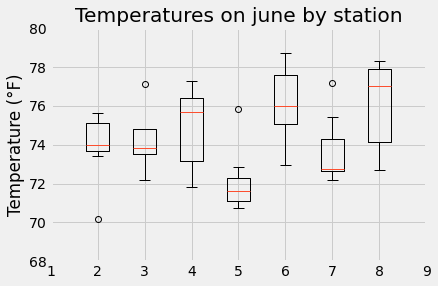

In [553]:
# lets see statistics
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures on june by station')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(june)
plt.ylim(ymax=80,ymin=68)
plt.xlim(xmax=9, xmin=1)
plt.savefig("Measurementsbystation.png")

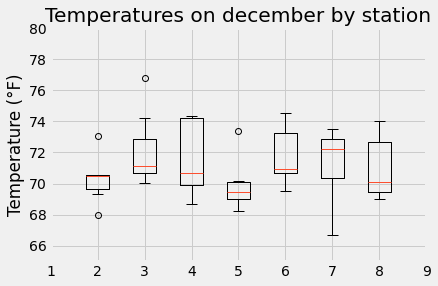

In [315]:
fig2, ax2 = plt.subplots()
ax2.set_title('Temperatures on december by station')
ax2.set_ylabel('Temperature (°F)')
ax2.boxplot(december)
plt.ylim(ymax=80,ymin=65)
plt.xlim(xmax=9, xmin=1)
plt.show()

In [329]:
# Getting paired sample t-test
stations = ['USC00519281', 'USC00519397', 'USC00513117' ,'USC00519523', 'USC00516128', 'USC00514830', 'USC00511918', 'USC00517948', 'USC00518838']
ttest_results=[]
for i in stations: 
    station_i = stats.ttest_rel(june[i],december[i]) 
    ttest_results.append(station_i)
pd.DataFrame(ttest_results)

,statistic,pvalue
0,3.084700,0.021533
1,2.904721,0.027167
2,4.434474,0.004402
3,2.546387,0.043703
4,6.263655,0.000769
5,1.944029,0.099882
6,5.637482,0.001334
7,NaN,NaN
8,NaN,NaN


As we can see, there was a statistically significant decrese in temperature for each station, even though the test was not able to be applied for the last two stations, because there are not enough data. However we can conclude that there are a significant difference between both months temperature, so we accept the alternative hipothesis.


## Temperature Analysis II


In [35]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:a
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [342]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

tempmin, tempavg, tempmax = calc_temps('2015-10-23','2016-10-23')[0]

tempavg, tempmin, tempmax


(74.44501940491591, 56.0, 84.0)

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


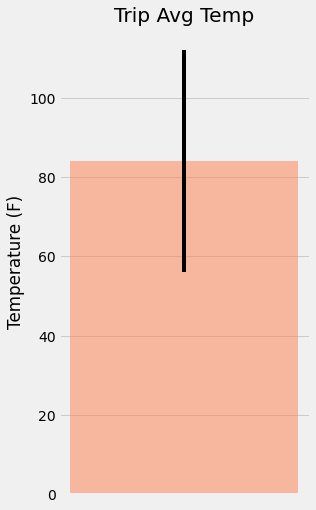

In [341]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
yerr = tempmax-tempmin
ax.bar(1, tempmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(1), xticklabels="a", title="Trip Avg Temp", ylabel="Temperature (F)")
fig.show()

In [347]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
G = (
    session
    .query(Station.station,  Station.name, Station.latitude, Station.longitude, Station.elevation)
    .filter(Station.station == Measurement.station)
    .filter(Measurement.date >= '2015-10-23').filter(Measurement.date <= '2016-10-23')
    .group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()
)

pd.DataFrame(G)

,station,name,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6


In [39]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [540]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
nomals = daily_normals("10-23")
# Set the start and end date of the trip
start = "2016-10-19"
end = "2016-10-23"
# Use the start and end date to create a range of dates
range_trip = ["2016-10-19", "2016-10-20", "2016-10-21", "2016-10-22", "2016-10-23"]
# Stip off the year and save a list of %m-%d strings
date_trip =[dt.datetime.strptime(date, "%Y-%m-%d") for date in range_trip]
# Loop through the list of %m-%d strings and calculate the normals for each date
date_trip_md = [dt.datetime.strftime(date,"%m-%d") for date in date_trip]
date_trip_md
#calculating the normas for each date
normals_trip = [daily_normals(trip) for trip in date_trip_md]
normals_trip

[[(65.0, 73.24489795918367, 81.0)],
 [(67.0, 74.79629629629629, 82.0)],
 [(66.0, 74.96078431372548, 82.0)],
 [(66.0, 74.84313725490196, 81.0)],
 [(66.0, 75.74468085106383, 84.0)]]

In [549]:
# create a  data frame for this 
df = pd.DataFrame(normals_trip)

minimal = df.stack().str[0].unstack()
average = df.stack().str[1].unstack()
maximal = df.stack().str[2].unstack()

frames = [minimal, average, maximal]

normals_trip_df = pd.concat(frames, axis=1)

normals_trip_df.columns = ["Minimal Temp", "Average Temp", "Maximal Temp"]
idx = 0
normals_trip_df.insert(loc=idx, column="Dates", value=range_trip)
normals_trip_df.set_index("Dates")

normals_trip_df

,Dates,Minimal Temp,Average Temp,Maximal Temp
0,2016-10-19,65.0,73.244898,81.0
1,2016-10-20,67.0,74.796296,82.0
2,2016-10-21,66.0,74.960784,82.0
3,2016-10-22,66.0,74.843137,81.0
4,2016-10-23,66.0,75.744681,84.0


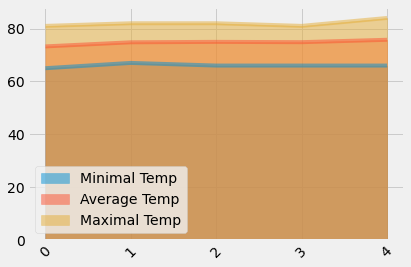

In [551]:
# Plot the daily normals as an area plot with `stacked=False`
normals_trip_df.plot.area(stacked=False, alpha=0.5)
plt.xticks(rotation=45)
plt.show()